# Sales Analysis


###  Objectives:
- Analyzing sales accross regions


# Importing libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # For ignoring warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("All tools loaded successfully!")

All tools loaded successfully!


## Loading the Sales DataSet

In [24]:
df = pd.read_csv('Sales_Transactions_3500.csv')

print("Data loaded successfully!")
print(f"We have {len(df)} sales records (rows)")
print(f"Each record has {len(df.columns)} pieces of information (columns)")

Data loaded successfully!
We have 3500 sales records (rows)
Each record has 12 pieces of information (columns)


In [25]:
# Displaying the first few rows
print("First 5 transactions:")
df.head()


First 5 transactions:


,OrderID,CustomerID,Gender,Age,Product,Category,Quantity,Price,TotalAmount,PaymentMethod,Region,PurchaseDate
0,O00001,C0435,Female,59.0,T-shirt,Fashion,1,369.82,369.82,MobileMoney,East,2025-03-30
1,O00002,C1337,Female,19.0,Jacket,Fashion,2,232.29,464.58,BankTransfer,North,2025-04-11
2,O00003,C0619,Male,28.0,Lipstick,Beauty,1,347.79,347.79,Cash,East,2024-07-14
3,O00004,C0033,Female,58.0,Vacuum Cleaner,Home,5,336.92,1684.60,Card,North,2024-05-24
4,O00005,C1199,Male,25.0,Smartphone,Electronics,1,85.37,85.37,MobileMoney,South,2025-05-10


## Exploring the Dataset

In [26]:
# Dataset structure
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OrderID        3500 non-null   object 
 1   CustomerID     3500 non-null   object 
 2   Gender         3500 non-null   object 
 3   Age            3106 non-null   float64
 4   Product        3500 non-null   object 
 5   Category       3500 non-null   object 
 6   Quantity       3500 non-null   int64  
 7   Price          3500 non-null   float64
 8   TotalAmount    3500 non-null   float64
 9   PaymentMethod  3500 non-null   object 
 10  Region         3500 non-null   object 
 11  PurchaseDate   3500 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 328.3+ KB


In [27]:
# Checking for missing values
print("\n--- Missing Values Check ---")
missing = df.isnull().sum()
# missing
print(missing[missing > 0])


--- Missing Values Check ---
Age    394
dtype: int64


In [28]:
if missing.sum() == 0:
    print("Great! No missing values found.")
else:
    print(f"\nTotal missing values: {missing.sum()}")
    # Showing percentage
    missing_pct = (missing / len(df)) * 100
    print("\nPercentage missing:")
    print(missing_pct[missing_pct > 0].round(2))


Total missing values: 394

Percentage missing:
Age    11.26
dtype: float64


# Filling Missing Age Values
Filling the age missing values with the median age

In [29]:
df['Age'].fillna(df['Age'].median(), inplace=True)

print(f"\nMissing ages now: {df['Age'].isnull().sum()}")
print("All age values are now complete!")


Missing ages now: 0
All age values are now complete!


Double checking for missing values

In [30]:
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OrderID        3500 non-null   object 
 1   CustomerID     3500 non-null   object 
 2   Gender         3500 non-null   object 
 3   Age            3500 non-null   float64
 4   Product        3500 non-null   object 
 5   Category       3500 non-null   object 
 6   Quantity       3500 non-null   int64  
 7   Price          3500 non-null   float64
 8   TotalAmount    3500 non-null   float64
 9   PaymentMethod  3500 non-null   object 
 10  Region         3500 non-null   object 
 11  PurchaseDate   3500 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 328.3+ KB


In [31]:
# Checking for duplicates
duplicates = df.duplicated().sum()
print(f"\n--- Duplicate Rows: {duplicates} ---")


--- Duplicate Rows: 0 ---


# Basic statistics for numerical columns

In [32]:
# Basic statistics for numerical columns
df.describe() # This automatically selects numerical columns

,Age,Quantity,Price,TotalAmount
count,3500.000000,3500.000000,3500.000000,3500.000000
mean,40.875143,3.006286,248.334569,745.756443
std,12.712784,1.423265,143.392362,587.723454
min,18.000000,1.000000,5.200000,5.250000
25%,31.000000,2.000000,120.772500,280.897500
50%,41.000000,3.000000,248.995000,575.990000
75%,51.000000,4.000000,369.487500,1110.330000
max,64.000000,5.000000,499.900000,2494.000000


Displaying the regional distribution

In [33]:
print("Regional Distribution:")
df['Region'].value_counts()

Regional Distribution:


,count
Region,
South,892
North,876
West,874
East,858


Regional Distribution:

*   The value counts show that the South region has the highest number of transactions, which indicates it is our biggest market in terms of customer activity.

*   Regions with fewer transactions, such as the East region, may need targeted marketing or could represent underdeveloped market opportunities.
*  The distribution helps us understand where most of the business activity is concentrated.


In [34]:
# Data range validation
print("Data Ranges:")
print(f"Age range: {df['Age'].min():.0f} to {df['Age'].max():.0f}")
print(f"Price range: ${df['Price'].min():.2f} to ${df['Price'].max():.2f}")
print(f"Quantity range: {df['Quantity'].min()} to {df['Quantity'].max()}")

Data Ranges:
Age range: 18 to 64
Price range: $5.20 to $499.90
Quantity range: 1 to 5


Explanation of the Results
1. Age Range (18 to 64 years)

The customer ages range from 18 to 64, which shows you have a broad and diverse customer base.
This indicates that the products appeal to both younger adults and older customers, which is beneficial for marketing strategies because it avoids dependency on a single age group.

2. Price Range ( 5.20 dollars to 499.90 dollars)

The price range spans from 5.20 dollars for lower-priced items to 499.90 dollars for high-value or premium products.
This wide price variation suggests:


*   The store offers both budget-friendly items and high-end products.

*   There is likely a mix of customer segments, from cost-conscious buyers to those willing to spend more.
*   Revenue drivers might come from the higher-priced items, even if purchased less frequently.


3. Quantity Range (1 to 5 units per transaction)

Quantities per purchase range from 1 to 5 units, which shows:


*   Most purchases are likely single-item transactions, typical of general retail behavior.
*   However, the upper bound of 5 units suggests some customers are making small bulk purchases, possibly for family or small business use.

This helps identify purchasing patterns and informs stocking strategies.

Summary

The data shows that customers range from 18 to 64 years old, indicating a broad demographic reach. Product prices range from 5.20 dollars to 499.90 dollars, demonstrating that the store offers both affordable and premium items, appealing to different customer segments. The quantity purchased per transaction varies from 1 to 5 units, suggesting that most customers buy single items, while a smaller portion makes slightly larger purchases. Overall, the results provide insight into customer demographics, product pricing diversity, and purchasing behavior.

In [35]:
# Configuring display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [36]:
df.head()

,OrderID,CustomerID,Gender,Age,Product,Category,Quantity,Price,TotalAmount,PaymentMethod,Region,PurchaseDate
0,O00001,C0435,Female,59.0,T-shirt,Fashion,1,369.82,369.82,MobileMoney,East,2025-03-30
1,O00002,C1337,Female,19.0,Jacket,Fashion,2,232.29,464.58,BankTransfer,North,2025-04-11
2,O00003,C0619,Male,28.0,Lipstick,Beauty,1,347.79,347.79,Cash,East,2024-07-14
3,O00004,C0033,Female,58.0,Vacuum Cleaner,Home,5,336.92,1684.60,Card,North,2024-05-24
4,O00005,C1199,Male,25.0,Smartphone,Electronics,1,85.37,85.37,MobileMoney,South,2025-05-10


# Calculating revenue distributed across regions.

In [37]:
# Revenue here can be measured by summing the TotalAmount per region.

#Calculating revenue per region

revenue_by_region = df.groupby('Region')['TotalAmount'].sum().round(2).reset_index()
revenue_by_region = revenue_by_region.sort_values('TotalAmount', ascending=False)
print("\n Revenue distributed across regions")
print("-----------------------------------")
print(revenue_by_region)



 Revenue distributed across regions
-----------------------------------
  Region  TotalAmount
3   West    668785.33
0   East    652270.37
2  South    647359.17
1  North    641732.68


# Visualization

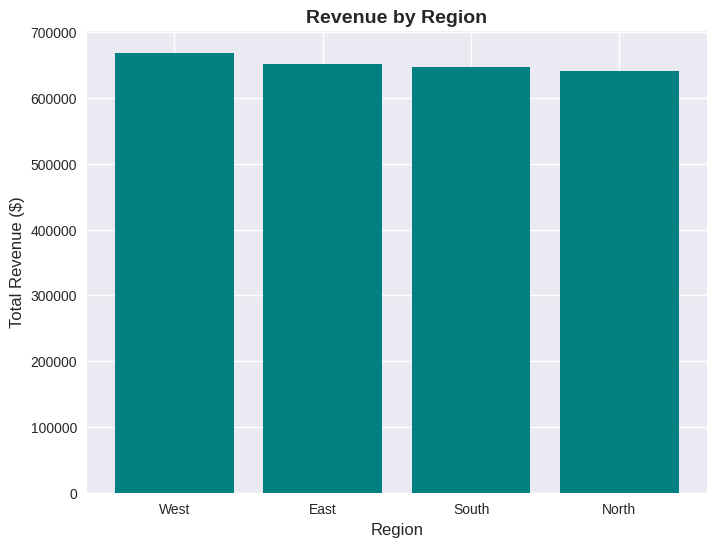

In [38]:
# Visualizing Revenue Distribution


plt.figure(figsize=(8,6))
plt.bar(revenue_by_region['Region'], revenue_by_region['TotalAmount'], color='teal')
plt.title('Revenue by Region',fontsize=14, fontweight='bold')
plt.xlabel('Region',fontsize=12)
plt.ylabel('Total Revenue ($)',fontsize=12)
plt.show()


##Key Findings

##1. The West Region Generates the Highest Revenue

The West region leads with $668,785.33, making it the top-performing region.
This suggests:
*   Strong sales activity
*   Possibly a larger customer base or higher-value purchases

*   Potential for continued growth with targeted marketing

## 2. East, South, and North Perform Similarly

The revenue for East, South, and North is fairly close, all within the $640k– $652k dollar range.

This indicates:


*   These regions have consistent and stable performance
*   No region is significantly underperforming

*   Opportunities exist to identify what drives slight differences and improve them further

##Strategic Insights:

*   Regions with high revenue could be targeted for premium products or loyalty programs.
*   Regions with lower revenue may need promotional campaigns or product adjustments to boost sales.


##3. Overall Business Insight

Revenue is well distributed across all regions, with no major performance gaps. The West region stands out as the strongest contributor, while the other three regions show steady and competitive revenue levels. This balanced distribution indicates healthy market penetration across the entire geography.







# **Pie Chart — Revenue Share by Region**

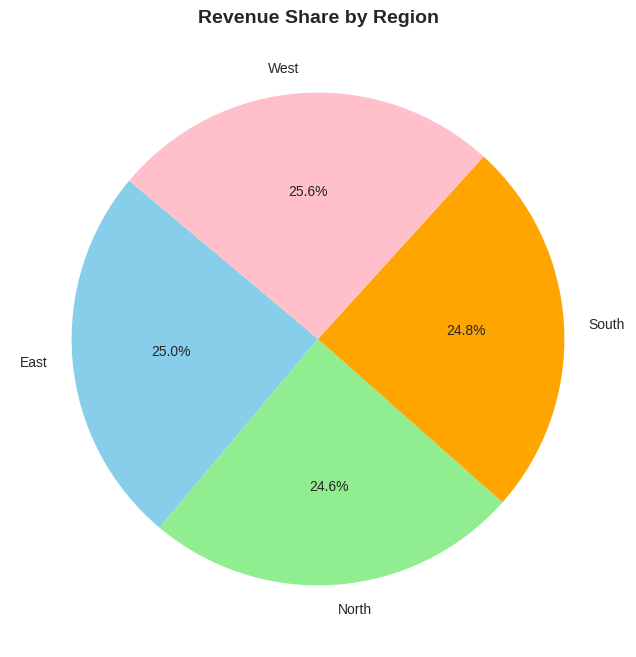

In [39]:

# Revenue by region
revenue_by_region = df.groupby('Region')['TotalAmount'].sum().round(2)

plt.figure(figsize=(8,8))
plt.pie(revenue_by_region, labels=revenue_by_region.index, autopct='%1.1f%%', startangle=140, colors=['skyblue','lightgreen','orange','pink'])
plt.title('Revenue Share by Region',fontsize=14,fontweight='bold')
plt.show()


Just like the analysis above,
we can easily see that the west region contributes the most revenue.The South,East and North regions may need growth strategies.


#**Regional Insights: Revenue, Average Transaction Value, and Quantity Sold**

## Aggregating revenue, average transaction value, and total quantity sold per region

In [40]:

region_summary = df.groupby('Region').agg(
    Revenue=('TotalAmount','sum'),
    AvgTransaction=('TotalAmount','mean'),
    TotalQuantity=('Quantity','sum')
).reset_index()

# Sort by revenue for consistency
region_summary = region_summary.sort_values('Revenue', ascending=False)
print("Region Summary:")
print("--------------------------------------------------")
print(region_summary)


Region Summary:
--------------------------------------------------
  Region    Revenue  AvgTransaction  TotalQuantity
3   West  668785.33      765.200606           2690
0   East  652270.37      760.221876           2568
2  South  647359.17      725.738980           2666
1  North  641732.68      732.571553           2598


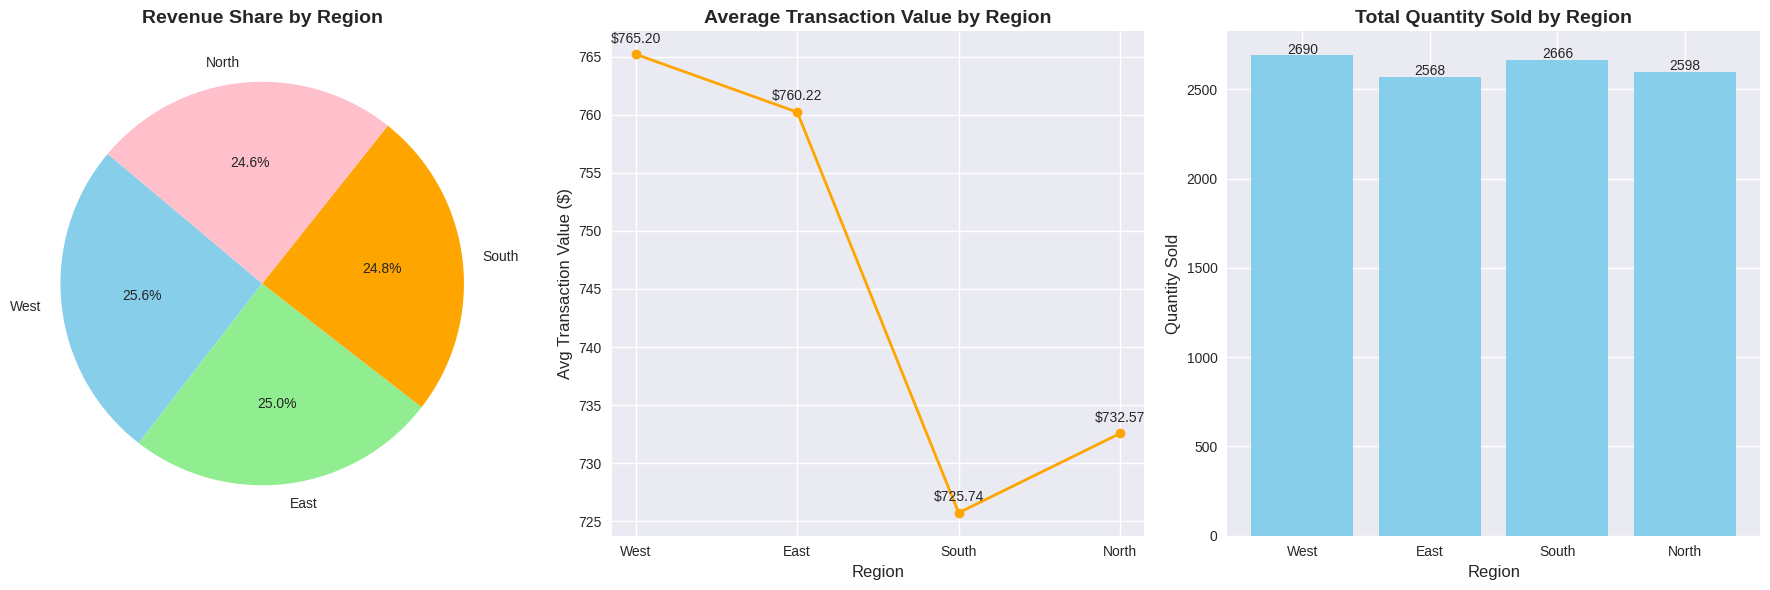

In [41]:

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,6))

# --- Left: Revenue Pie Chart ---
ax1.pie(region_summary['Revenue'], labels=region_summary['Region'], autopct='%1.1f%%',
        startangle=140, colors=['skyblue','lightgreen','orange','pink'])
ax1.set_title('Revenue Share by Region',fontsize=14, fontweight='bold')

# --- Middle: Avg Transaction Value Line Chart ---
ax2.plot(region_summary['Region'], region_summary['AvgTransaction'], marker='o', color='orange', linewidth=2)
for i, value in enumerate(region_summary['AvgTransaction']):
    ax2.text(i, value + 1, f"${value:.2f}", ha='center')
ax2.set_title('Average Transaction Value by Region',fontsize=14, fontweight='bold')
ax2.set_xlabel('Region',fontsize=12)
ax2.set_ylabel('Avg Transaction Value ($)',fontsize=12)

# --- Right: Total Quantity Sold Bar Chart ---
ax3.bar(region_summary['Region'], region_summary['TotalQuantity'], color='skyblue')
for i, value in enumerate(region_summary['TotalQuantity']):
    ax3.text(i, value + 10, f"{value}", ha='center')
ax3.set_title('Total Quantity Sold by Region',fontsize=14, fontweight='bold')
ax3.set_xlabel('Region',fontsize=12)
ax3.set_ylabel('Quantity Sold',fontsize=12)

plt.tight_layout()
plt.show()



#**Regional Sales Performance Analysis**

The analysis reveals that the West region is the strongest performer across all key metrics. It contributes the largest share of total revenue, records the highest average transaction value, and sells the greatest number of units, indicating both strong customer demand and higher spending per order. The East region shows moderate performance in revenue and average transaction value but lower sales volume, suggesting potential for improvement through targeted promotions or upselling initiatives. Meanwhile, the South and North regions generate lower revenues and average transaction values, although their sales quantities are moderate. These regions represent growth opportunities that could be unlocked through localized marketing efforts, improved product availability, or pricing adjustments. Overall, the West region’s strong results highlight it as a key market driver, while the other regions offer room for strategic expansion.

# **Summary**

The West region leads overall, showing the highest revenue, sales volume, and average transaction value — making it the company’s strongest market. The East performs moderately, while the South and North show lower spending and revenue, highlighting opportunities for targeted growth and regional marketing efforts.